In [1]:
from modules.training_and_fine_tuning.training.train_cnn_model_using_mel_spectrogram import CnnModelUsingMelSpectrogram
from keras.models import load_model
from config.eng_config import Config
import matplotlib.pyplot as plt
from modules.training_and_fine_tuning.utils.mel_spectrogram_image_data_utils import MelSpectrogramDataUtils
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [2]:
input_shape = (128,128,3)
num_classes = 7

In [3]:
ser_model = CnnModelUsingMelSpectrogram((input_shape), num_classes)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
def get_n_mels_paths(n_mels, Config):
    train_path = Config.n_mels_config[n_mels].train_path
    validation_path = Config.n_mels_config[n_mels].validation_path
    test_path = Config.n_mels_config[n_mels].test_path
    return train_path, validation_path, test_path

In [5]:
def get_train_test_val_data(n_mels, Config):
    train_path, test_path, val_path = get_n_mels_paths(n_mels, Config)
    X_train, y_train = MelSpectrogramDataUtils.process_data(train_path)
    X_val, y_val = MelSpectrogramDataUtils.process_data(val_path)
    X_test, y_test = MelSpectrogramDataUtils.process_data(test_path)
    return X_train, y_train, X_val, y_val, X_test, y_test

# Chuẩn bị mô hình

In [6]:
def prepare_model(n_mels, Config):
    X_train, y_train, X_val, y_val, X_test, y_test = get_train_test_val_data(n_mels, Config)
    model_name = f'models/cnn_model_using_mel_spectrogram_with_{n_mels}_n_mels'
    history = ser_model.train_model(X_train, y_train, X_val, y_val, model_name, patience_early_stop = 5, patience_lr_reduction = 3, factor= 0.5, epochs= 50, batch_size = 64, learning_rate = 0.000007)
    history_dict = history.history
    ModelUtilities.plot_training_history(history_dict)
    
    model = ModelUtilities.load_model(f'{model_name}.keras')

    ModelUtilities.evaluate_model(model, X_val, y_val)
    classes = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
    ModelUtilities.plot_confusion_matrix(model, X_val, y_val, classes)
    ModelUtilities.plot_confusion_matrix_normalized(model, X_val, y_val, classes)


**Thử nghiệm với n_mels = 128**

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 75s 170ms/step - accuracy: 0.1832 - loss: 1.9057 - val_accuracy: 0.3126 - val_loss: 1.7841 - learning_rate: 7.0000e-06
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.2967 - loss: 1.7703 - val_accuracy: 0.4196 - val_loss: 1.6186 - learning_rate: 7.0000e-06
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.3799 - loss: 1.6407 - val_accuracy: 0.4608 - val_loss: 1.5214 - learning_rate: 7.0000e-06
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 74s 169ms/step - accuracy: 0.4136 - loss: 1.5566 - val_accuracy: 0.4625 - val_loss: 1.4435 - learning_rate: 7.0000e-06
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.4426 - loss: 1.4868 - val_accuracy: 0.4836 - val_loss: 1.3913 - learning_rate: 7.0000e-06
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 72s 165ms/step - accuracy: 0.4636 - loss: 1.4229 - val_accuracy: 0.5087 - val_loss: 1.3459 - learning_rate: 7.0000e-06
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 72s 16

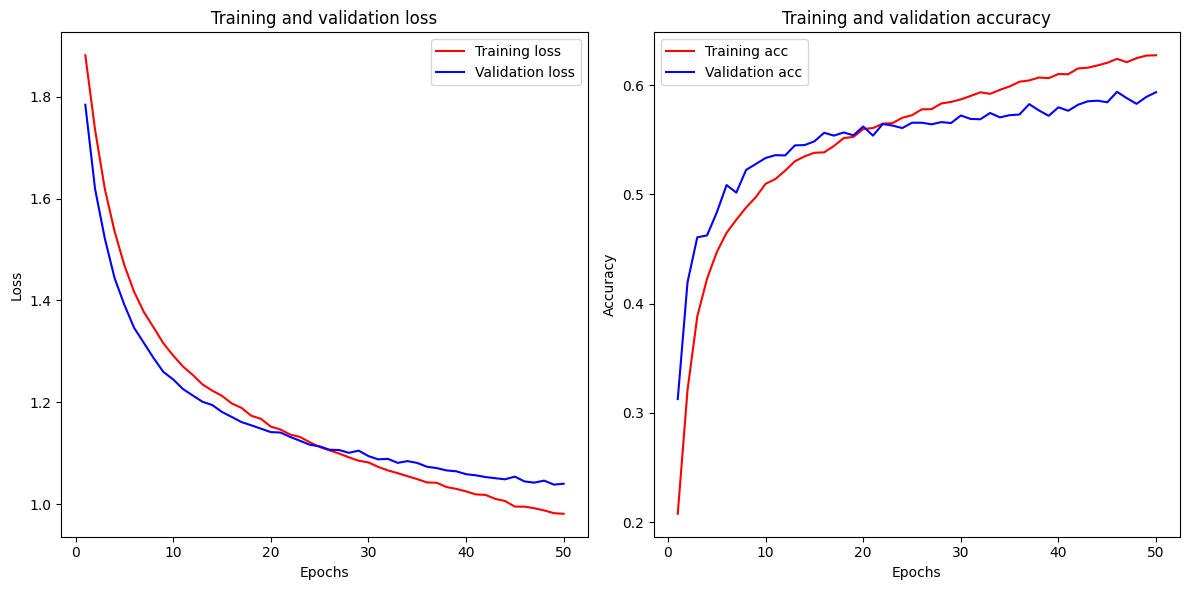

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6089 - loss: 1.0038
Test Accuracy: 0.5940023064613342
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


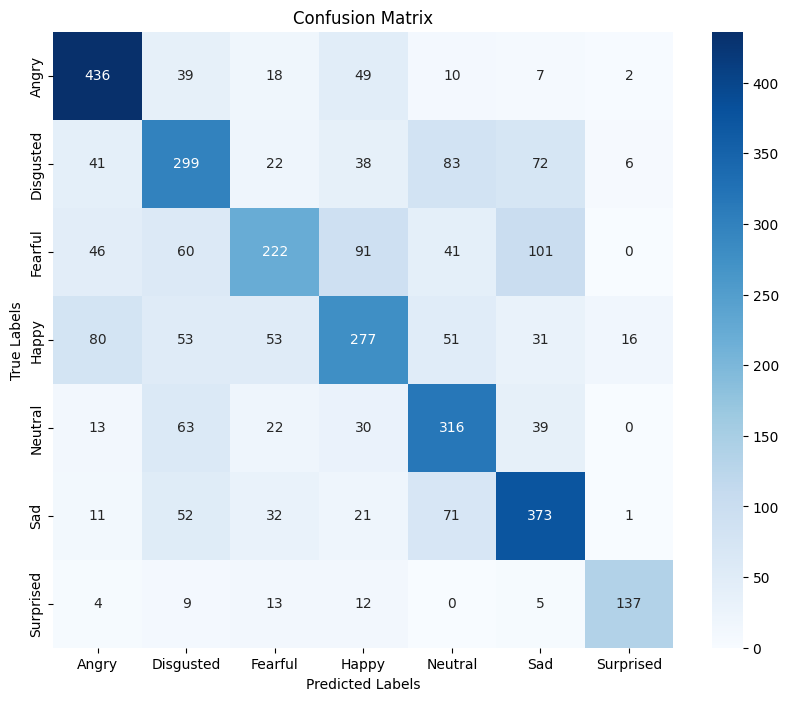

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


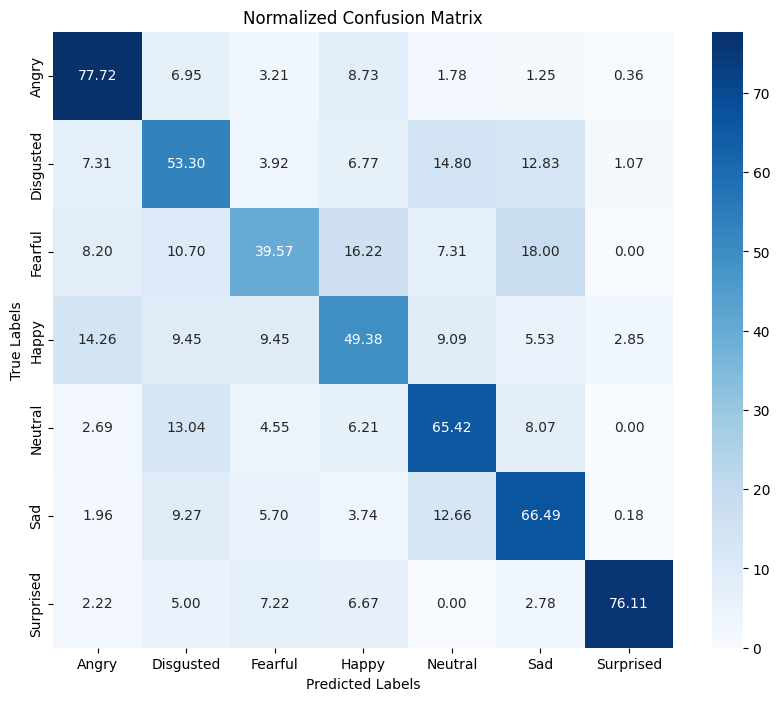

In [7]:
prepare_model(128, Config)